In [1]:
options(jupyter.rich_display = FALSE)

# CMPE 140 - Repetition structures

# Repetition structures
* The `while` loop 
* The `for` loop
* `break` and `next` statements
* The `repeat` loop
* Nested loops
* Vectorization and loops

# Repetition (aka loops)

* Repeating a block of code as long as a condition is true.
* Example: Search for a book in an unordered stack.
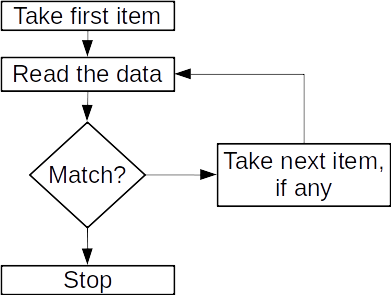

# Loops in R

* Loops are fundamental, all languages have them.
* In R, loops are implicit to many common tasks (`sum()`, `mean()`, `sapply()`, etc.). Makes them faster.
* Explicit loops are needed less often than other languages, but they _are_ needed.

# The while loop

Simple example: Print the squares of 1, 2, ... 10.

Without loops, it would be cumbersome:

In [2]:
i <- 1
cat(i,i^2,"\n")
i <- i+1
cat(i,i^2, "\n")
i <- i+1
cat(i,i^2, "\n")

1 1 
2 4 
3 9 


With loops, it is shorter and more flexible:

In [3]:
i <- 1 # initialization
while (i<=10) {  # condition
    cat(i,i^2,"\n")
    i <- i+1  # update
}
"Goodbye"

1 1 
2 4 
3 9 
4 16 
5 25 
6 36 
7 49 
8 64 
9 81 
10 100 


[1] "Goodbye"

# General structure of the `while` loop

    <initialization>
    while( <condition> ) {
        <statements>
        <update variables>
    }

* `<condition>` is a Boolean expression, usually involving existing variables.
* If `<condition>` is true the block is executed (this is called one _iteration_).
* When the block is completed, the condition is reevaluated and the block is re-executed if necessary.

# Updating the variables

* In general, we want the condition to become false eventually, otherwise the loop never ends.
* The variables of the program must be updated within the block to ensure that.

In [4]:
i <- 1 # initialization
while (i<=10) {  # condition
    cat(i,i^2,"\n")
    #i <- i+1  # update
}

1 1 
2 4 
3 9 
4 16 
5 25 
6 36 
7 49 
8 64 
9 81 
10 100 


# Example

Find the sum of elements in a vector

Without a loop:

In [ ]:
mydata <- c(-1,4,2,5,1,4,6,2,0)
total <- 0
i <- 1
total <- total + mydata[i]
i <- i+1
total <- total + mydata[i]
i <- i+1
total <- total + mydata[i]
#...

With a loop

In [7]:
mydata <- c(-1,4,2,5,1,4,6,2,0,5)
total <- 0
i <- 1
while (i<=length(mydata)){
    total <- total + mydata[i]
    cat(i, mydata[i], total, "\n")
    i <- i + 1
}
total

1 -1 -1 
2 4 3 
3 2 5 
4 5 10 
5 1 11 
6 4 15 
7 6 21 
8 2 23 
9 0 23 
10 5 28 


[1] 28

# Example

Find the maximum element in a vector

In [9]:
mydata <- c(1,4,2,5,1,4,6,2,0,7,3,1)
largest <- mydata[1]
i <- 2
while (i<=length(mydata)){
    if(mydata[i]>largest)
        largest <- mydata[i]
    i <- i + 1
}
largest

[1] 7

The for loop
-----------
* Alternative to `while` that does not take a Boolean condition.
* The `for` statement takes elements from a vector one by one, and runs the loop body with the current element.
* The loop terminates when the last element is used.

In [11]:
for(i in c(2,-1,5,3,7)) {
    cat(i,i^2,"\n")
}

2 4 
-1 1 
5 25 
3 9 
7 49 


* In many cases `for` is simpler than `while`, especially when you need to iterate over the elements of a vector.
* Example: Add up the elements in a vector with `for`:

In [12]:
mydata <- c(-1,4,2,5,1,4,6,2,0)
total <- 0
for (d in mydata)
    total <- total + d
total

[1] 23

The line `for(d in mydata)` means that `d` first gets `mydata[1]`, then `mydata[2]`, etc, until all the elements in `mydata` are used up.

Find the maximum value in a vector with a `for` loop.

In [13]:
mydata <- c(1,4,2,5,1,4,6,2,0)
largest <- mydata[1]
for(d in mydata) 
    if(d>largest) 
        largest <- d
largest

[1] 6

# Example
Note that by using `for` you don't need to keep track of the element index. This is OK if you are interested in the element values only, but it might not work if the element's location is relevant.

Example: Find the index of the maximum value in a vector.

In [15]:
mydata <- c(1,4,2,5,1,4,6,2,0)
largest <- mydata[1]
largest_index <- 1
i <- 2
while (i<=length(mydata)){
    if(mydata[i]>largest){
        largest_index <- i
        largest <- mydata[i]
    }
    i <- i + 1
}

cat(largest_index, largest)

7 6

Rewrite this as a function

In [16]:
getmax <- function(x) {
    largest <- x[1]
    largest_index <- 1
    i <- 2
    while (i<=length(x)){
        if(x[i]>largest){
            largest_index <- i
            largest <- x[i]
        }
        i <- i + 1
    }
    c(largest_index, largest)
}
getmax(mydata)

[1] 7 6

The break statement
---------------

When the program encounters a `break` statement, it terminates the loop. The remainder of the block is skipped over.

In [17]:
i <- 1
while(i<=10){
    if(i==7)
        break
    cat("i =",i,"\n")
    i <- i+1
}
cat("Goodbye")

i = 1 
i = 2 
i = 3 
i = 4 
i = 5 
i = 6 
Goodbye

Same with a `for` loop

In [18]:
for(i in 1:10){
    if (i==7)
        break
    cat("i =",i,"\n")
}

i = 1 
i = 2 
i = 3 
i = 4 
i = 5 
i = 6 


# Example
Determine if a given number is prime

In [21]:
n <- 87659867241
prime <- TRUE # assume prime unless proven otherwise
i <- 2
while (i <= sqrt(n)){  # check only up to the square root of n
    if (n%%i == 0){
        prime <- FALSE
        break
    }
    i <- i+1
}
if (!prime) cat(n,"is not prime;",i,"divides it.")

87659867241 is not prime; 3 divides it.

Rewrite this as a function

In [20]:
isprime <- function(n) {
    prime <- TRUE # assume prime unless proven otherwise
    i <- 2
    while (i*i <= n){  # check only up to the square root of n
        if (n%%i == 0){
            prime <- FALSE
            break
        }
        i <- i+1
    }
    prime
}

isprime(87659867241)

[1] FALSE

# The next statement

* Takes the program flow to the beginning of the loop.
* Skips over the remaining statements.

In [22]:
i<-0
while(i<=10){
    i <- i+1
    if( i%%3==0 )
        next
    cat(i, "")
}

1 2 4 5 7 8 10 11 

Caution: If the update statement is located after `next`, the loop may not terminate.

In [ ]:
i<-1
while(i<=10){
    if( i%%3==0 )
        next
    cat(i, "")
    i <- i+1
}

# Example
Print the digits of a positive number

In [23]:
x <- 512
x%%10 # 2
x <- floor(x/10)
x # 51
x%%10 # 1
x <- floor(x/10)
x # 5
x%%10 # 5
x <- floor(x/10)
x # 0

[1] 2

[1] 51

[1] 1

[1] 5

[1] 5

[1] 0

In [24]:
x <- 1764502
while (x>0){
    lastdig <- x%%10
    x <- floor( x/10 )
    cat(lastdig,"\n")
}

2 
0 
5 
4 
6 
7 
1 


Collect into a vector:

In [25]:
x <- 1764502
v <- c()
while (x>0){
    v <- c(x%%10, v)
    x <- floor( x/10 )
}
v

[1] 1 7 6 4 5 0 2

The repeat loop
------------

* The `repeat` statement provides an infinite loop.
* Does not take a test. To end the loop, use `break`.

In [26]:
i <- 1
repeat {
    i <- i + 3
    cat(i,"")
    if(i>10) break
}

4 7 10 13 

The `next` statement works in the same way in `repeat` loops.

In [27]:
i <- -2
repeat {
    i <- i + 1
    if (i%%3==0) next
    cat(i,"")
    if(i>10) break
}

-1 1 2 4 5 7 8 10 11 

# Which loop structure?
* `while` is the most general one
* `repeat` is the same as `while(TRUE)`
* `for` is more convenient when going over sequences such as vectors.


Nested loops
-----------

A loop body can contain anything, including other loops.

In [28]:
for (i in 1:4) {
    cat("i =",i,"\n")
    for (j in c(7,8,9))
        cat("   i+j =",i+j,"\n")
}

i = 1 
   i+j = 8 
   i+j = 9 
   i+j = 10 
i = 2 
   i+j = 9 
   i+j = 10 
   i+j = 11 
i = 3 
   i+j = 10 
   i+j = 11 
   i+j = 12 
i = 4 
   i+j = 11 
   i+j = 12 
   i+j = 13 


# Example
Print a triangle of stars with size 5.

    *
    **
    ***
    ****
    *****

In [30]:
nlines <- 7
for (line in 1:nlines){
    for (col in 1:line)
        cat("*")
    cat("\n")
}

*
**
***
****
*****
******
*******


# Example
Simple bar chart: Given a vector `x` with positive integer entries, print `x[l]` stars for each line `l`.

In [31]:
x <- c(5,2,8,5,1,4,7,10,3)
for (line in 1:length(x)){
    for (col in 1:x[line])
        cat("*")
    cat("\n")
}

*****
**
********
*****
*
****
*******
**********
***


# Example
Write a function that takes two vectors and prints all products of numbers where the first factor comes from the first vector, and the second factor comes from the second vector. 

    pair_product( 2:3, 7:9 )    
    2 * 7 = 14 
    2 * 8 = 16 
    2 * 9 = 18 
    3 * 7 = 21 
    3 * 8 = 24 
    3 * 9 = 27 

In complicated problems, it is best to start with the simplest case and gradually add features.

First, take only two numbers and display their product:

In [32]:
a <- 2
b <- 7
cat(a, "*", b, "=", a*b, "\n")

2 * 7 = 14 


Next, make one parameter a vector, and "wrap a loop" around `cat()`.

In [33]:
a <- 2
b_vector <- c(7,3,8)
for (b in b_vector){
    cat(a, "*", b, "=", a*b, "\n")    
}

2 * 7 = 14 
2 * 3 = 6 
2 * 8 = 16 


Finally, make the other factor a vector and wrap an outer loop around the existing loop.

In [35]:
pair_product <- function(a_vector, b_vector){
    for (a in a_vector){
        for (b in b_vector){
            cat(a, "*", b, "=", a*b, "\n")
        }
    }
}
pair_product(c(2,3,-1),c(7,3,8,5))

2 * 7 = 14 
2 * 3 = 6 
2 * 8 = 16 
2 * 5 = 10 
3 * 7 = 21 
3 * 3 = 9 
3 * 8 = 24 
3 * 5 = 15 
-1 * 7 = -7 
-1 * 3 = -3 
-1 * 8 = -8 
-1 * 5 = -5 


# Example: List Pythagorean triples
A _Pythagorean triple_ consists of three integers a,b,c such that $a^2 + b^2 = c^2$ holds. Let us determine all Pythagorean triplets such that $a,b\leq 100$.

In [ ]:
for (a in 1:100)
    for(b in 1:100)
        for(c in b:142) # think about the possible values c can take.
            if (a*a + b*b == c*c)
                cat(a,b,c,"\n")

**Question.** We get repetitions such as `3 4 5` and `4 3 5`, which are really not different. How do we remove such repetitions?

# Performance of vectorized operations and loops

* Many tasks involve applying looping over vector elements.
* R has built-in vectorized functions for these tasks, but we can implement our own with loops.
* Consider adding two vectors and assigning the result on a third:

In [36]:
x <- c(1,2,3)
y <- c(4,5,6)
z <- x + y
z

[1] 5 7 9

Alternative way by using a `for` loop

In [37]:
z <- vector(length=length(x))
for(i in 1:length(x))
    z[i] <- x[i] + y[i]
z

[1] 5 7 9

Let's measure the time that the computer takes for each operation. We use large vectors so that we can see the time difference clearly.

In [38]:
x <- runif(1000000)
y <- runif(1000000)
system.time(z <- x+y) # Time taken by vectorized addition 

   user  system elapsed 
  0.002   0.005   0.006 

In [39]:
z <- vector(length=1000000)
system.time(for(i in 1:length(x)) z[i] <- x[i] + y[i]) # time taken by explicit loop.

   user  system elapsed 
    0.1     0.0     0.1 

* There is a large difference between execution times.
* This is due to the implementation of R: The `for()` loop, the `:` operator, the index operator `[` are all function calls, which slows the code.
* Vectorized functions are written with C: They run fast.
* **When dealing with large data, use vectorized functions instead of a loop, whenever possible.**

# Example: Moving average
Moving averages are a way to smooth the data. For example, the 2-element sample moving average of a vector $v$ with $n$ elements is defined as

$$ \left(\frac{v_1+v_2}{2},\frac{v_2+v_3}{2},\frac{v_3+v_4}{2}, \ldots, \frac{v_{n-1}+v_n}{2}\right)$$

Let's generate some synthetic data with an upward trend and some random noise.

In [ ]:
data <- cumsum(sample(c(-1,2),size = 100, replace=TRUE))
plot(data, type="l")

In [ ]:
movav <- vector(length=length(data)-1)
for(i in 1:length(data)-1)
    movav[i] <- (data[i] + data[i+1])/2

In [ ]:
plot(data, type="l")
lines(movav, col="red")

Implement this in vectorized form:

In [ ]:
movav <- (data[1:length(data)-1] + data[2:length(data)])/2

# Further examples

# Fibonacci sequence
A _Fibonacci sequence_ starts with 1 and 1, and each new value is the sum of the two previous values. Formally:
$$\begin{eqnarray}
F_1 &=& 1\\
F_2 &=& 1\\
F_{n} &=& F_{n-1} + F_{n-2}
\end{eqnarray}$$

Each number in this sequence is called a _Fibonacci number_. Let us write R code that displays the first 20 Fibonacci numbers.

In [ ]:
f1 <- 1
f2 <- 1

In [ ]:
for (i in 3:20){
    temp <- f1
    f1 <- f2
    f2 <- f2 + temp
    cat(f2,"\n")
}

# Compound interest

In [ ]:
account_balance <- 10000
interest_rate <- 0.1
years <- 10
balance_vec <- account_balance
for (y in 1:years){
    account_balance <- account_balance * (1+interest_rate)
    balance_vec <- c(balance_vec, account_balance)
    cat("After",y,"years your account balance is",account_balance,"\n")
}

# Series sum
Evaluate the sum $$\sum_{i=1}^{n} 2^{-i} = \frac{1}{2} + \frac{1}{4} +\ldots + \frac{1}{2^n}$$ for given $n$.

In [ ]:
n <- 5
total <- 0
for (i in 1:n) {
    total <- total + 1/2^i
}
total

As $n\rightarrow\infty$, the sum must approach 1. To see this, let us wrap another loop around the code to change n.

In [ ]:
for (n in 2:20){
    total <- 0
    for (i in 1:n) {
        total <- total + 1/2^i
    }
    cat("n =",n,", series total =",total,"\n")
}

# Exercises

# Implement `sum` and `cumsum`
Implement the `sum()` and `cumsum()` functions using R's loop structures. Test your functions with some simple cases to ensure that they work correctly. Using random vectors of size 1,000,000 as input, compare their speed with the built-in versions.

# Digits of a number
Write a function `digits(x)` that takes a positive integer and returns a vector of its digits. For example, `digits(0667230)` should return the vector `(6,6,7,2,3,0)`.

# Digital sums
Write a function named `digitsum` which takes a positive integer and returns the sum of digits (the "digital sum") of the input. For example, the function call `digitsum(35274)` should return 21.

Using this function, find the number between 1 and 1 million that has the largest digital sum.

# Migration
Currently there are 1,000,000 inhabitants in city A, and 500,000 in city B. Each year, 2% of people in city A move to city B, and 3% of people in city A move to city B. The intrinsic growth rate of both cities is 1% (i.e., the growth in the absence of any migration).

Plot the population of both cities for the next 20 years.

# Collatz numbers
The _Collatz sequence_ is defined as follows:
* Start with any positive integer $n$.
* If $n$ is even, set $n \leftarrow n/2$
* If $n$ is odd, set $n \leftarrow 3n+1$
* If $n=1$, stop.

For example, starting with 10, the Collatz sequence is 10, 5, 16, 8, 4, 2, 1. The number of steps required to reach 1 is 6.

It is believed that for any starting point the sequence ends with 1. However, this is not proven.

* Write a function `collatzlen(n)` that returns the number of steps required to go from n to 1 in a Collatz sequence. For example, `collatzlen(10)` should return 6.
* Plot the Collatz sequence length for $n$ going from 2 to 100.
* For which starting value between 100 and 200 does the Collatz sequence have the largest length?